# F1 analysis

<br><p style='text-align: justify;text-indent: 40px'>A Fórmula 1 (originalmente e brevemente conhecida como Fórmula A) traçou suas raízes nos primeiros dias do automobilismo e emergiu da dinâmica cena de corrida europeia dos anos entre guerras. Os planos para um campeonato de pilotos de Fórmula 1 foram discutidos no final da década de 1930, mas foram arquivados com o início da Segunda Guerra Mundial. Em 1946, a idéia foi reavivada e, nessa temporada, foram realizadas as primeiras corridas e, no ano seguinte, foi tomada a decisão de lançar um campeonato de pilotos. Demorou até 1950 para que os detalhes fossem ajustados e, em maio de 1950, a primeira corrida do campeonato mundial foi realizada em Silverstone.</p>

<br>

### Bibliotecas, importação dos dados e limpeza

In [11]:
#Vamos, inicialmente, importar as bibliotecas necessárias: dplyr, ggplot2, repr e wordcloud2:
library(dplyr)
library(ggplot2)
library(repr)

#Desativaremos as janelas de informações sobre as importaçõoes das bibliotecas:
options(warn=-1)

#Além disso, usaremos o seguinte tema para os gráficos do ggplot2:
theme_set(theme_bw())

#Ajustando tamanho dos gráficos:
options(repr.plot.width=10, repr.plot.height=5)

#Em seguida, importamos os dados em csv:
constructors <- read.csv("constructors.csv")
drivers <- read.csv("drivers.csv")
races <- read.csv("races.csv", skipNul = TRUE)
results <- read.csv("results.csv",sep=',',stringsAsFactors=F)

#Precisamos corrigir o tipo das colunas "fastestLapSpeed" e "fastestLapTime". 

#Nesta última, vamos transformar os valores, contabilizados em minutos, segundos e milisegundos, em, apenas, segundos.

#Alterando tipo da primeira coluna mencionada:
results$fastestLapSpeed <- as.numeric(results$fastestLapSpeed)

#Alterando tipo da segunda coluna:
convertfastestLap <- function(x){
    if(length(x)>0){
        minutos <- as.numeric(strsplit(x,":")[[1]][1])
        segundos <- as.numeric(strsplit(strsplit(x,":")[[1]][2],"\\.")[[1]][1])
        return(minutos*60+segundos)
        }
        else if(length(x)==0){
            return(NA)
        }
}
results$fastestLapTime <- sapply(results$fastestLapTime, convertfastestLap)

#Construiremos um data frame apenas com os pilotos campeões em corridas.

#Para isso, inicialmente, selecionamos apenas as linhas com os pilotos vencedores:
filtrar_vencedores <- (results$positionText=="1")
vencedores <- results[filtrar_vencedores,]

#Percebemos que alguns dados da planilha "results" estão associados a outras planilhas, uniremos todos abaixo:

#Unindo "vencedores"/"results" e "drivers":
resultado_vencedores <- merge(x=vencedores[,c("raceId", "driverId","constructorId","position","fastestLapTime","fastestLapSpeed")], y=drivers[,c("driverId","surname","nationality")], by="driverId")
resultado_geral <- merge(x=results[,c("raceId","driverId","constructorId","position")], y=drivers[,c("driverId","surname","nationality")], by="driverId")

#Unindo "resultado_vencedores"/"resultado_geral" e "races":
resultado_vencedores <- merge(x=resultado_vencedores[,c("raceId","constructorId","position","fastestLapTime","fastestLapSpeed","surname","nationality")], y=races[,c("raceId","year","name","date")], by="raceId")
resultado_geral <- merge(x=resultado_geral[,c("raceId","constructorId","position","surname","nationality")], y=races[,c("raceId","year","name","date")], by="raceId")

#O data frame "constructors" tem duas colunas com nomes repetidos ("nationality" e "name") representando dados diferentes, antes de fazer merge, vamos alterar seus nomes:
names(constructors)[3:4] <- c("cons_name","nationality_constructor")

#Unindo "resultado_vencedores/"resultado_geral" e "constructor":
resultado_vencedores <- merge(x=resultado_vencedores[,c("constructorId","position","fastestLapTime","fastestLapSpeed","surname","nationality","year","name","date")], y=constructors[,c("constructorId","cons_name","nationality_constructor")], by="constructorId")
resultado_geral <- merge(x=resultado_geral[,c("constructorId","position","surname","nationality","year","name","date")], y=constructors[,c("constructorId","cons_name","nationality_constructor")], by="constructorId")

### Escuderias

<br><p style='text-align: justify;text-indent: 40px'>Uma era de domínio britânico foi inaugurada pela vitória no campeonato de Mike Hawthorn em 1958, embora Stirling Moss estivesse na vanguarda do esporte sem nunca garantir o título mundial. Entre Jim Clark, Jackie Stewart, John Surtees, Jack Brabham, Graham Hill e Denny Hulme, os pilotos britânicos e da Commonwealth venceram nove campeonatos de pilotos e as equipes britânicas conquistaram dez títulos de construtores entre 1962 e 1973. O icônico British Racing Green Lotus, com um revolucionário chassi monocoque de chapa de alumínio, em vez do design tradicional de estrutura espacial, foi o dominante carro e, em 1968, a equipe quebrou novos limites quando foi a primeira a veicular publicidade em seus carros.</p>

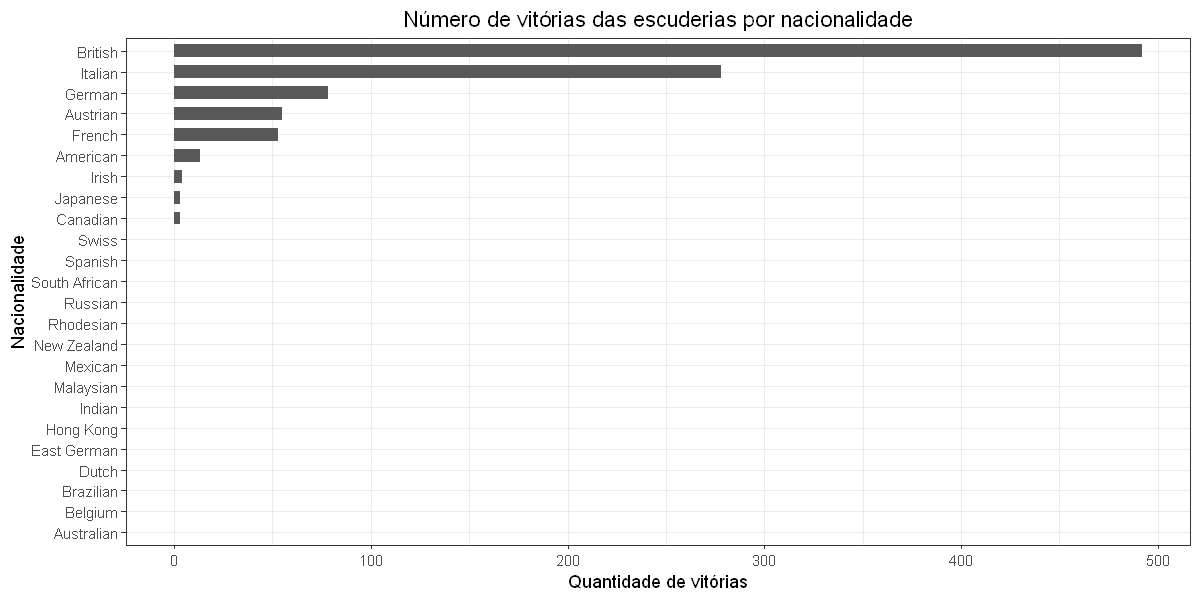

In [2]:
#Começaremos a análise através das escuderias.

#Somando quantidade de vitórias das escuderias por nacionalidade:
esc_vitorias <- summary(resultado_vencedores$nationality_constructor)

#Criando um data frame a partir da contagem realizada acima:
esc_vitorias_nacionalidade <- data.frame(esc_vitorias)

#Adicionando coluna da nacionalidade:
esc_vitorias_nacionalidade$nacionalidade <- rownames(esc_vitorias_nacionalidade)

#Ordenando a coluna vitórias de maneira decrescente:
esc_vitorias_nacionalidade <- esc_vitorias_nacionalidade[order(esc_vitorias_nacionalidade$esc_vitorias,decreasing = T),]

#Construindo gráfico:
plot_esc_vitorias_nacionalidade <- ggplot(data=esc_vitorias_nacionalidade, aes(x=reorder(nacionalidade, esc_vitorias), y=esc_vitorias))
  plot_esc_vitorias_nacionalidade + geom_bar(stat="identity", width=0.6) + xlab("Nacionalidade") + ylab("Quantidade de vitórias") +
  ggtitle("Número de vitórias das escuderias por nacionalidade") + theme(plot.title = element_text(hjust=0.5)) + coord_flip()

<br><p style='text-align: justify;text-indent: 40px'>Os carros se tornaram mais rápidos e mais escorregadios. A Lotus novamente foi a inovadora quando introduziram a aerodinâmica de efeito no solo, que proporcionou enorme força descendente e aumentou muito as velocidades nas curvas. No início da década de 1970, os dias de entradas particulares estavam quase tão altos quanto os custos das corridas. Não só isso, com o advento dos carros turboalimentados, as velocidades e a potência também avançaram. A segurança continuou sendo uma preocupação, Stewart se aposentou na véspera da sua última corrida após a morte de seu amigo e companheiro de equipe François Cevert nos treinos, antes do Grande Prêmio dos EUA em 1973. Em 1975, Fittipaldi se recusou a dirigir no Grande Prêmio da Espanha, que foi parado após 29 voltas quando um carro entrou na multidão, matando quatro espectadores.</p>
<p style='text-align: justify;text-indent: 40px'>A Ferrari começou a se reafirmar com os pilotos Niki Lauda e Clay Regazzoni, o primeiro a conquistar o primeiro dos três títulos de pilotos em 1975. Ele venceu seis das nove primeiras corridas em 1976, antes que um acidente horrível no Grande Prêmio da Alemanha o deixasse com queimaduras. Quase inacreditavelmente, ele estava de volta ao cockpit seis semanas depois. Em seguida, a Lotus liderou novamente o caminho em 1978 com a introdução da tecnologia de efeitos no solo, usando saias laterais e design da parte inferior da carroceria para dar ao carro uma aderência fenomenal. Mario Andretti foi supremo ao vencer 6 das 16 corridas. Mas o ano foi novamente marcado por uma tragédia quando o companheiro de equipe Ronnie Peterson foi morto em Monza. Isso marcou o começo do fim para o lendário time da Lotus e foi o último ano em que venceram o campeonato.</p>

<p style='text-align: justify;text-indent: 40px'>A partir de então, os turbos, que apareceram pela primeira vez em 1977, passaram a governar o poleiro. Piquet conquistou seu segundo título em 1983 com Brabham, e a vitória de Lauda em 1984 marcou o início de um período de domínio da McLaren, no qual conquistaram o título dos pilotos em sete dos oito anos com Alain Prost e Ayrton Senna. O zênite da equipe aconteceu em 1988, quando venceu 15 das 16 corridas, mas na temporada seguinte os turbos foram banidos e o relacionamento entre os dois pilotos se deteriorou rapidamente. Para combater o poder fenomenal dos carros, foram introduzidas restrições e, eventualmente, os turbocompressores foram banidos em 1989. Nos anos 80, começaram a surgir ajudas eletrônicas aos motoristas (novamente a Lotus estava na vanguarda) e, no início dos anos 90, caixas de velocidades semiautomáticas e controle de tração foram uma progressão natural. A batalha entre as novas tecnologias e o desejo da FIA de combater as acusações de que os pilotos eram cada vez menos relevantes que os caixões, continuou nas duas décadas seguintes. McLaren e Williams continuaram a governar o poleiro nos anos 90. No total, a McLaren venceu 16 campeonatos (sete de construtores e nove de pilotos) nesse período, enquanto a Williams os equipou com 16 títulos próprios (nove de construtores e sete de pilotos).</p>

<p style='text-align: justify;text-indent: 40px'>A rivalidade entre Prost e Senna terminou em 1993 com a aposentadoria de Prost e, em 1994, Senna morreu em Ímola. Sua morte foi um divisor de águas, pois levou a aumentos consideráveis nos padrões de segurança. A FIA introduziu medidas para diminuir a velocidade dos carros e melhorar sua segurança. Mas os puristas continuaram argumentando que a corrida tinha mais a ver com técnicos e designers do que com pilotos e, como muitos outros esportes, algumas equipes dominavam. McLaren, Williams, Renault (antiga Benetton) e Ferrari venceram todos os campeonatos do mundo entre 1984 e 2008. Os altos custos da Fórmula 1 aumentaram o abismo entre os quatro maiores e os menores independentes. Entre 1990 e 2008, 28 equipes foram e vieram, poucas fazendo mais do que uma marca efêmera. Nos últimos anos, o contraste se manteve com as vitórias predominantes da Aston Martin Red Bull Racing e da Mercedes-AMG Petronas Motorsport.</p>

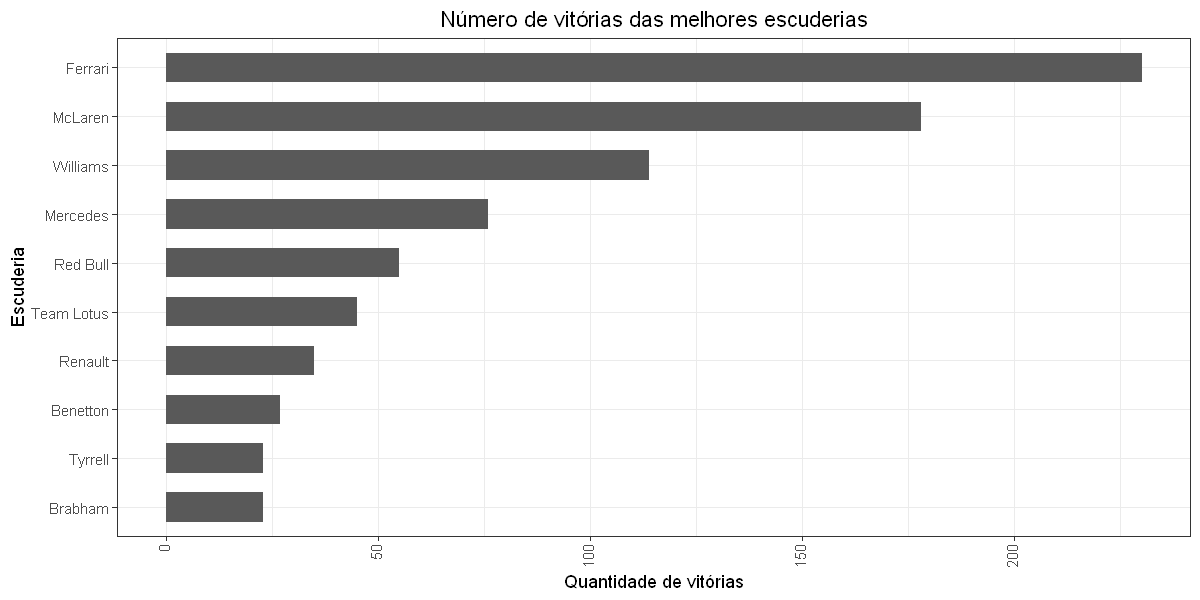

In [3]:
#Somando quantidade de vitórias das escuderias:
top_esc <- summary(resultado_vencedores$cons_name)

#Criando data frame a partir da contagem acima:
top_esc <- data.frame(top_esc)

#Adicionando coluna do nome das escuderias:
top_esc$cons_name <- rownames(top_esc)

#Ordenando a quantidade de vitórias de maneira decrescente:
top_esc <- top_esc[order(top_esc$top_esc,decreasing = T),]

#Selecionando as melhores escuderias:
top_esc <- head(top_esc,10)

#Construindo gráfico:
plot_esc_vitorias <- ggplot(data=top_esc, aes(x=reorder(cons_name, top_esc), y=top_esc))
  plot_esc_vitorias + geom_bar(stat="identity", width=0.6) + xlab("Escuderia") +
  ylab("Quantidade de vitórias") + ggtitle("Número de vitórias das melhores escuderias") +
  theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.25), plot.title = element_text(hjust=0.5)) + coord_flip()

<br>

### Nacionalidade dos melhores pilotos

<br><p style='text-align: justify;text-indent: 40px'>Ao longo dos anos, vários nomes se destacaram. Entre os pilotos com maior número de vitórias, destacam-se os britânicos.</p>

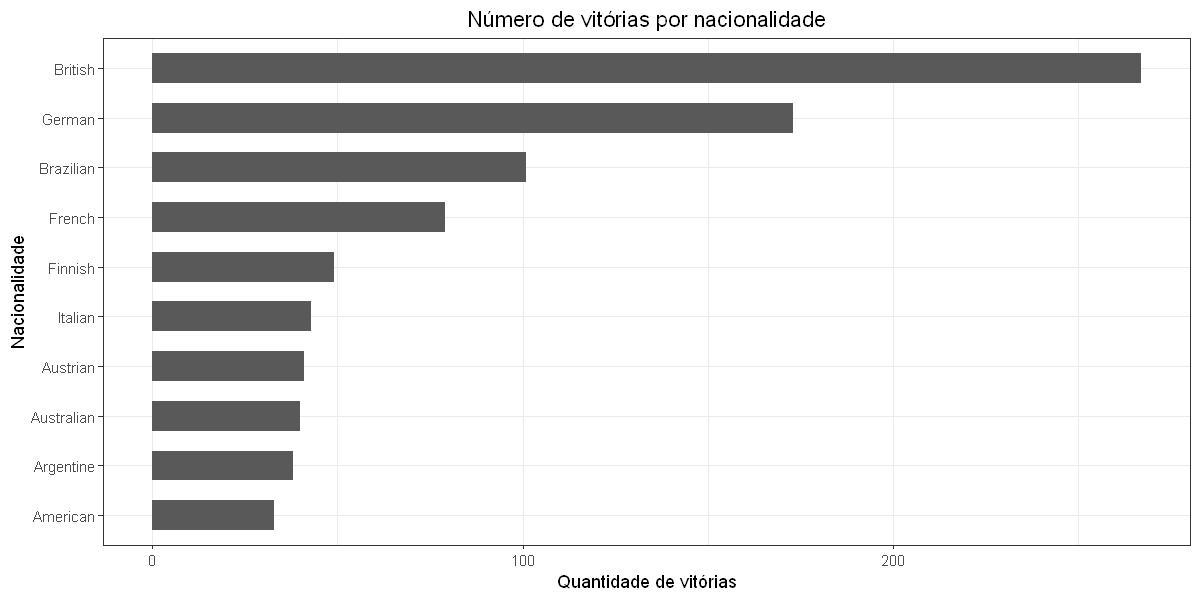

In [4]:
#Somando quantidade de vitórias dos pilotos por nacionalidade:
vitorias <- summary(resultado_vencedores$nationality)

#Criando um data frame a partir da contagem realizada acima:
vitorias_nacionalidade <- data.frame(vitorias)

#Adicionando coluna da nacionalidade:
vitorias_nacionalidade$nacionalidade <- rownames(vitorias_nacionalidade)

#Ordenando a coluna vitórias de maneira decrescente:
vitorias_nacionalidade <- vitorias_nacionalidade[order(vitorias_nacionalidade$vitorias,decreasing = T),]

#Selecionando a quantidade de nacionalidades para plotagem:
vitorias_nacionalidade <- head(vitorias_nacionalidade,10)

#Construindo gráfico:
plot_vitorias_nacionalidade <- ggplot(data=vitorias_nacionalidade, aes(x=reorder(nacionalidade, vitorias), y=vitorias))
  plot_vitorias_nacionalidade + geom_bar(stat="identity", width=0.6) + xlab("Nacionalidade") + ylab("Quantidade de vitórias") +
  ggtitle("Número de vitórias por nacionalidade") + theme(plot.title = element_text(hjust=0.5)) + coord_flip()

<br><p style='text-align: justify;text-indent: 40px'>Existe um número de vitórias muito alto dos britânicos, verificando a quantidade de vezes que eles participaram, nota-se que correram uma quantidade de vezes muito superior às demais nacionalidades.</p>

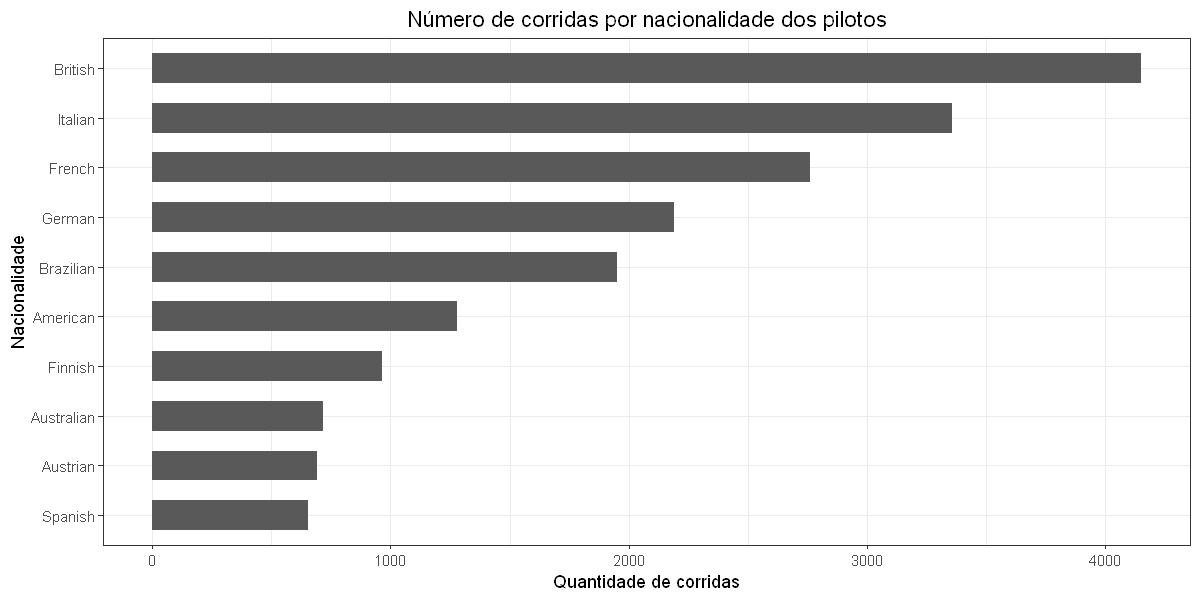

In [5]:
#Somando quantidade de participações por nacionalidade:
participacoes <- summary(resultado_geral$nationality)

#Criando um data frame a partir da contagem realizada acima:
participacoes_nacionalidade <- data.frame(participacoes)

#Adicionando coluna da nacionalidade:
participacoes_nacionalidade$nacionalidade <- rownames(participacoes_nacionalidade)

#Ordenando a coluna participações de maneira decrescente:
participacoes_nacionalidade <- participacoes_nacionalidade[order(participacoes_nacionalidade$participacoes,decreasing = T),]

#Selecionando a quantidade de nacionalidades para plotagem:
participacoes_nacionalidade <- head(participacoes_nacionalidade,10)

#Construindo gráfico:
plot_participacoes_nacionalidade <- ggplot(data=participacoes_nacionalidade, aes(x=reorder(nacionalidade, participacoes), y=participacoes))
  plot_participacoes_nacionalidade + geom_bar(stat="identity", width=0.6) + xlab("Nacionalidade") + ylab("Quantidade de corridas") +
  ggtitle("Número de corridas por nacionalidade dos pilotos") + theme(plot.title = element_text(hjust=0.5)) + coord_flip()

<br><p style='text-align: justify;text-indent: 40px'>Pode-se investigar, ainda, buscando uma comparação justa, a taxa de vitória por nacionalidade. Os britâncos permanecem no ranking, como terceiro colocados, atrás dos argentinos e alemães.</p>

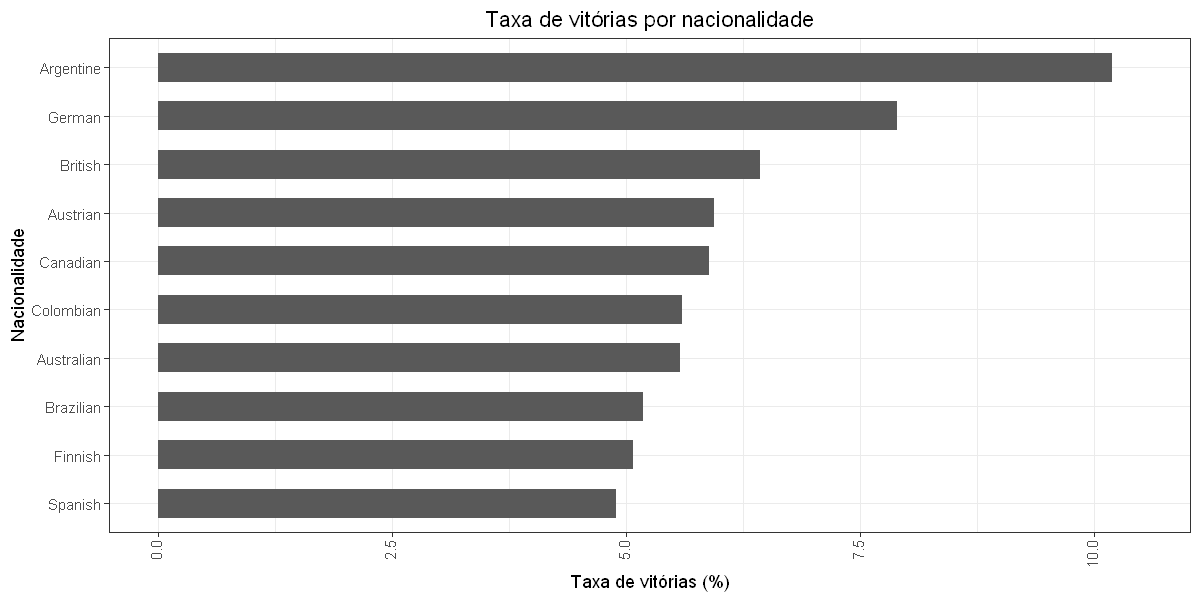

In [6]:
#Criando data frame a partir dos vetores criados anterioremente:
porcentagem_vitorias_nacionalidade = data.frame(vitorias,participacoes)

#Adicionando coluna da nacionalidade:
porcentagem_vitorias_nacionalidade$nacionalidade <- rownames(porcentagem_vitorias_nacionalidade)

#Calculando razão entre vitórias e participações:
porcentagem_vitorias_nacionalidade$porcentagem <- 100*(porcentagem_vitorias_nacionalidade$vitorias)/(porcentagem_vitorias_nacionalidade$participacoes)

#Ordenando a coluna porcentagem de maneira decrescente:
porcentagem_vitorias_nacionalidade <- porcentagem_vitorias_nacionalidade[order(porcentagem_vitorias_nacionalidade$porcentagem,decreasing = T),]

#Selecionando os dez primeiros para plotagem:
porcentagem_vitorias_nacionalidade <- head(porcentagem_vitorias_nacionalidade,10)

#Construindo gráfico:
plot_porcentagem_vitorias_nacionalidade <- ggplot(data=porcentagem_vitorias_nacionalidade, aes(x=reorder(nacionalidade, porcentagem), y=porcentagem))
  plot_porcentagem_vitorias_nacionalidade + geom_bar(stat="identity", width=0.6) + xlab("Nacionalidade") + ylab("Taxa de vitórias (%)") +
  ggtitle("Taxa de vitórias por nacionalidade") +
  ylim(0,10.5) + theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.25), plot.title = element_text(hjust=0.5)) + coord_flip()

<br>

### Quem foram/são os melhores?

<br><p style='text-align: justify;text-indent: 40px'>Quantitativamente, os pilotos com o maior número de vitórias são Schumacher, Hamilton, Prost, Vettel e Senna.</p>

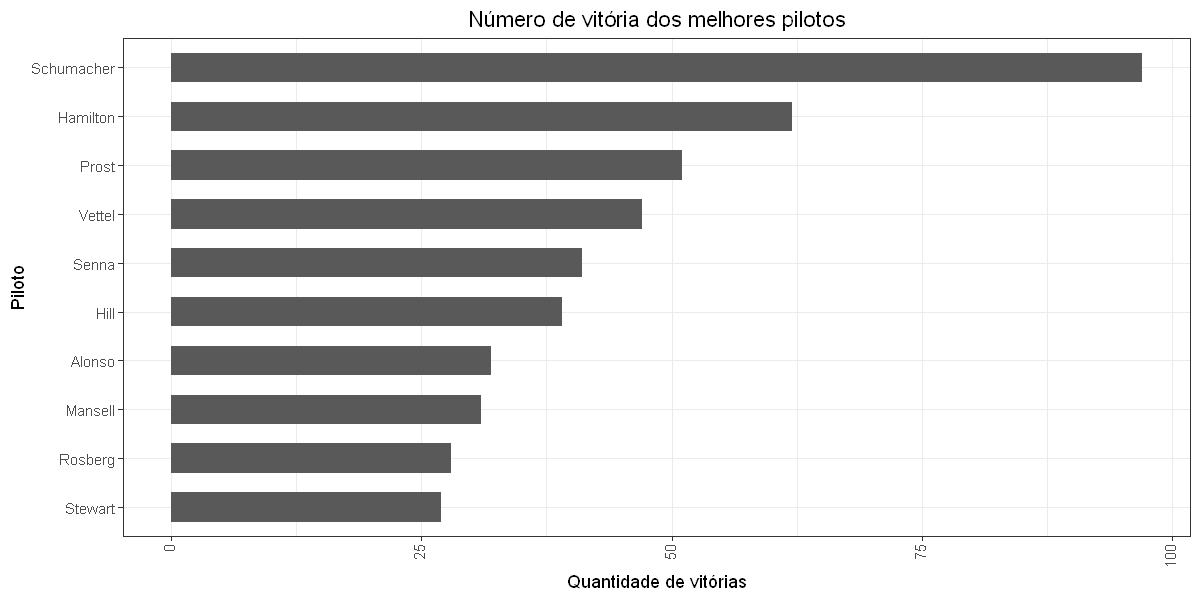

In [7]:
#Somando quantidade de vitórias dos pilotos:
top_vitorias <- summary(resultado_vencedores$surname)

#Criando data frame a partir da contagem acima:
top_drivers <- data.frame(top_vitorias)

#Adicionando coluna do nome dos pilotos:
top_drivers$surname <- rownames(top_drivers)

#Ordenando a quantidade de vitórias de maneira decrescente:
top_drivers <- top_drivers[order(top_drivers$top_vitorias,decreasing = T),]

#Selecionando primeiros colocados para plotagem:
top_drivers <- head(top_drivers,10)

#Construindo gráfico:
plot_top_drivers <- ggplot(data=top_drivers, aes(x=reorder(surname,top_vitorias), y=top_vitorias))
  plot_top_drivers + geom_bar(stat="identity", width=0.6) + xlab("Piloto") +
  ylab("Quantidade de vitórias") + ggtitle("Número de vitória dos melhores pilotos") +
  theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.25), plot.title = element_text(hjust=0.5)) + coord_flip()

<br><p style='text-align: justify;text-indent: 40px'>Adotando a estratégia anterior de analisar o percentual de vitórias em relação às participações o quadro fica um pouco diferente. Os principais nomes, dessa vez, são Wallard, Fangio e Vukovich.</p>

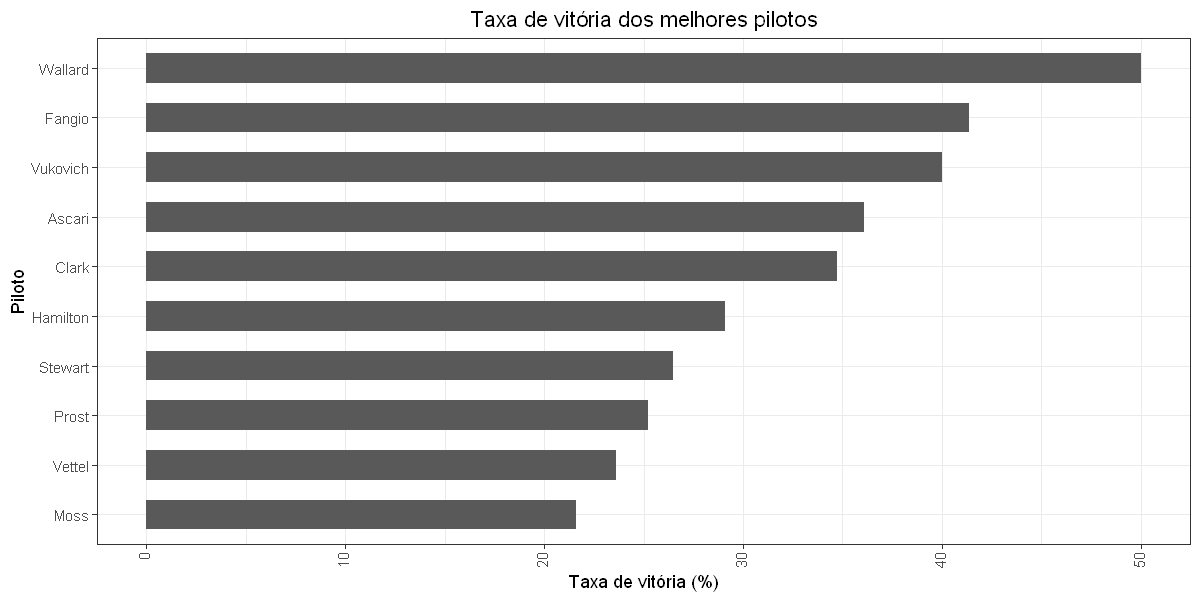

In [8]:
#Somando quantidade de vitórias dos pilotos e quantidade de participações:
pl_vitorias <- summary(resultado_vencedores$surname,1000)
pl_participacoes <- summary(resultado_geral$surname,1000)

#Criando data frame a partir da contagem acima:
vit_porcentagem = data.frame(pl_vitorias, pl_participacoes)

#Adicionando colunas dos nomes dos pilots e da porcentagem de vitória:
vit_porcentagem$surname <- rownames(vit_porcentagem)
vit_porcentagem$porcentagem <- 100*(vit_porcentagem$pl_vitorias)/(vit_porcentagem$pl_participacoes)

#Odernando a porcentagem de maneira decrescente:
pl_ratio <- vit_porcentagem[order(vit_porcentagem$porcentagem,decreasing = T),]

#Selecionando os primeiros colocados para plotagem:
pl_ratio <- head(pl_ratio,10)

#Construindo gráfico:
plot_pl_ratio <- ggplot(data=pl_ratio, aes(x=reorder(surname, porcentagem), y=porcentagem))
  plot_pl_ratio + geom_bar(stat="identity", width=0.6) + xlab("Piloto") +
  ylab("Taxa de vitória (%)") + ggtitle("Taxa de vitória dos melhores pilotos") +
  theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.25), plot.title = element_text(hjust=0.5)) + coord_flip()

<br>

### Evolução dos carros

<br><p style='text-align: justify;text-indent: 40px'>Os carros passaram por enormes avanços tecnológicos. As primeiras temporadas foram realizadas com carros pré-guerra, como o Alfa's 158. Eles eram de motor dianteiro, com pneus de piso estreito e motores de 1,5 litro sobrealimentados ou motores normalmente aspirados de 4,5 litros. Quando os regulamentos da Fórmula 1 retornaram em 1954, os motores estavam limitados a 2,5 litros. A Mercedes Benz fez grandes desenvolvimentos até que se retirou de todos os esportes a motor após o desastre de 1955 em Le Mans. No final dos anos 50, a Cooper introduziu um carro com motor traseiro e, em 1961, todos os fabricantes os usavam. Como incentivo adicional para as equipes, um campeonato de construtores foi introduzido em 1958. Nas últimas temporadas, os pilotos estão reduzindo os tempos de prova e aumentando a velocidade média nas pistas, isso se deve principalmente ao uso dos motores híbridos, com mil cavalos, é verdadeiramente uma obra-prima da engenharia moderna.</p>

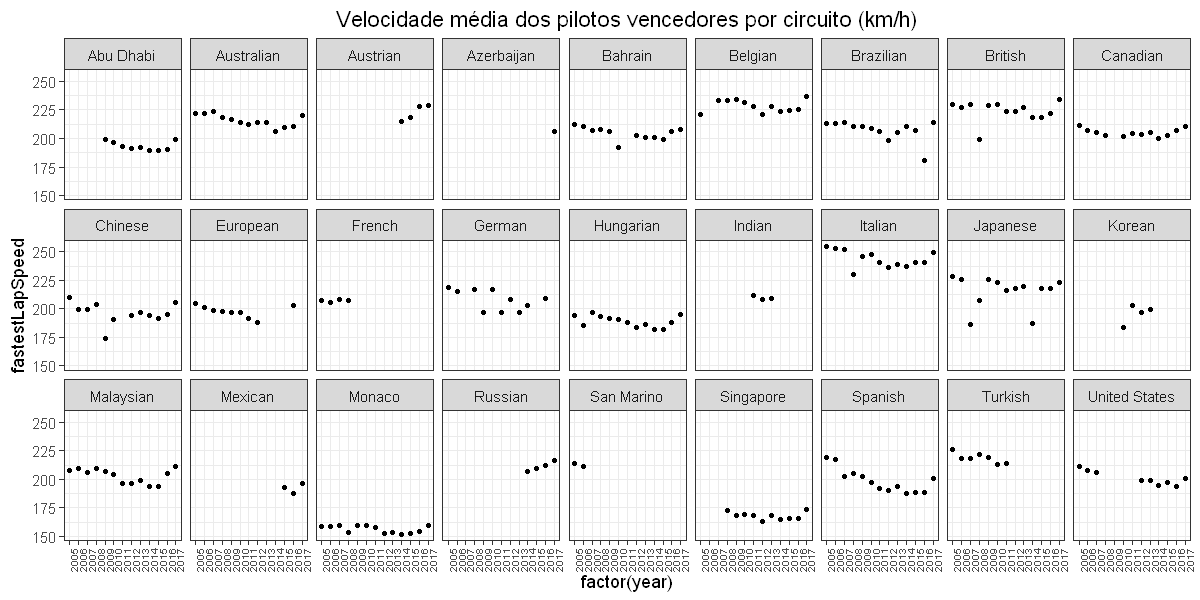

In [9]:
#Vamos agora conferir a evolução dos carros em velocidade e tempo de prova.

#Selecionando dados após 2004 (anteriores a 2005 são nulos):
resultado_vencedores_2005_2017 <- resultado_vencedores[which(resultado_vencedores$year > 2004),]

#Removendo "Grand Prix" do nome dos circuitos:
resultado_vencedores_2005_2017$name<-gsub(" Grand Prix","",resultado_vencedores_2005_2017$name)

#Plotagem:
resultado_vencedores_2005_2017 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>%
  ggplot(aes(x=factor(year),y= fastestLapSpeed), ) + 
  geom_point(size=1) + 
  theme(
    axis.text.x = element_text(size=6,angle=90), plot.title = element_text(hjust=0.5)) + facet_wrap(~name,ncol=9) + 
  labs(title='Velocidade média dos pilotos vencedores por circuito (km/h)') +
  guides(color=FALSE)

<br><p style='text-align: justify;text-indent: 40px'>Existe um contraste evidente nos dados após a implantação dos motores hibrídos, a volta mais rápida tem sido batida ano após ano.</p>

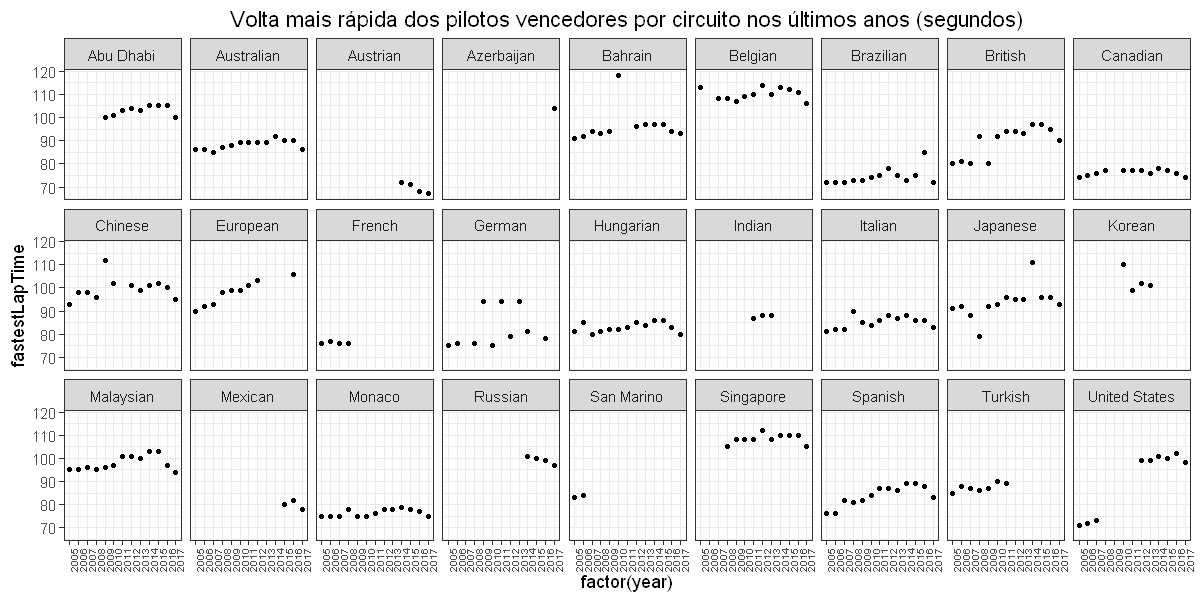

In [10]:
resultado_vencedores_2005_2017 %>% 
  dplyr::filter(year>2004) %>% 
  dplyr::group_by(name,year) %>% 
  ggplot(aes(x=factor(year),y= fastestLapTime)) + 
  geom_point(size=1) + 
  theme(
    axis.text.x = element_text(size=6,angle=90), plot.title = element_text(hjust=0.5)) + facet_wrap(~name,ncol=9) + 
  labs(title='Volta mais rápida dos pilotos vencedores por circuito nos últimos anos (segundos)') +
  guides(color=FALSE)

<br>

### Referências

<br>

Base de dados: https://ergast.com/mrd/db/

Texto: http://en.espn.co.uk/f1/motorsport/story/3831.html